In [1]:
%%time
# Import the VSO client and create an instance
from sunpy.net.vso import VSOClient
client = VSOClient()

# Search AIA 171 Angstrom data for the 6th december 2010
query_response = client.query_legacy(tstart='2010/12/06 00:00:00', tend='2010/12/07 00:00:00', instrument='AIA', wave='171', sample=3600)

# Sort the query response by date and print it 
query_response.sort(key=lambda x: x.time.start)
print query_response

# Download the first two from ROB to /tmp folder and wait for download to complete
results = client.get(query_response[0:2], path='F:/Research/Downloads/{file}', site='rob')
files = results.wait()

   Start Time [1]       End Time [1]    Source Instrument   Type  
------------------- ------------------- ------ ---------- --------
2010-12-06 00:00:00 2010-12-06 00:00:01    SDO        AIA FULLDISK
2010-12-06 01:00:00 2010-12-06 01:00:01    SDO        AIA FULLDISK
2010-12-06 02:00:00 2010-12-06 02:00:01    SDO        AIA FULLDISK
2010-12-06 03:00:08 2010-12-06 03:00:09    SDO        AIA FULLDISK
2010-12-06 04:00:00 2010-12-06 04:00:01    SDO        AIA FULLDISK
2010-12-06 05:00:00 2010-12-06 05:00:01    SDO        AIA FULLDISK
2010-12-06 06:00:00 2010-12-06 06:00:01    SDO        AIA FULLDISK
2010-12-06 07:00:00 2010-12-06 07:00:01    SDO        AIA FULLDISK
2010-12-06 08:00:00 2010-12-06 08:00:01    SDO        AIA FULLDISK
2010-12-06 09:00:00 2010-12-06 09:00:01    SDO        AIA FULLDISK
                ...                 ...    ...        ...      ...
2010-12-06 14:00:00 2010-12-06 14:00:01    SDO        AIA FULLDISK
2010-12-06 15:00:00 2010-12-06 15:00:01    SDO        AIA FULL

C:\Users\Akared\Anaconda\lib\site-packages\pandas\computation\__init__.py:19: UserWarning: The installed version of numexpr 2.4.4 is not supported in pandas and will be not be used

  UserWarning)


KeyboardInterrupt: 

#HMI data

In [5]:
from sunpy.net.vso import VSOClient
client = VSOClient()

In [1]:
%%time
query_response = client.query_legacy(tstart='2016/03/01 00:00:00', tend='2010/03/01 03:00:00', instrument='HMI', physobs='intensity', sample=3600)

# Sort the query response by date and print it 
query_response.sort(key=lambda x: x.time.start)
print query_response

NameError: name 'client' is not defined

In [12]:
%%time
query_response = client.query_legacy(tstart='2010/12/06 00:00:00', tend='2010/12/07 00:00:00', instrument='HMI', 
                                     physobs='los_magnetic_field', sample=3600)


Wall time: 2.39 s


In [13]:
query_response.sort(key=lambda x: x.time.start)
print query_response

   Start Time [1]       End Time [1]    Source Instrument   Type  
------------------- ------------------- ------ ---------- --------
2010-12-06 00:00:26 2010-12-06 00:00:27    SDO        HMI FULLDISK
2010-12-06 01:00:26 2010-12-06 01:00:27    SDO        HMI FULLDISK
2010-12-06 02:00:26 2010-12-06 02:00:27    SDO        HMI FULLDISK
2010-12-06 03:23:41 2010-12-06 03:23:42    SDO        HMI FULLDISK
2010-12-06 04:00:26 2010-12-06 04:00:27    SDO        HMI FULLDISK
2010-12-06 05:00:26 2010-12-06 05:00:27    SDO        HMI FULLDISK
2010-12-06 06:00:26 2010-12-06 06:00:27    SDO        HMI FULLDISK
2010-12-06 07:00:26 2010-12-06 07:00:27    SDO        HMI FULLDISK
2010-12-06 08:00:26 2010-12-06 08:00:27    SDO        HMI FULLDISK
2010-12-06 09:00:26 2010-12-06 09:00:27    SDO        HMI FULLDISK
                ...                 ...    ...        ...      ...
2010-12-06 13:00:26 2010-12-06 13:00:27    SDO        HMI FULLDISK
2010-12-06 14:00:26 2010-12-06 14:00:27    SDO        HMI FULL

In [2]:
# Read the image and header of the AIA fits file located at files[0] (see above)
# In SunPy this is done by constructing a Map object
from sunpy.map import Map
aia_map = Map(files[0])

C:\Users\Akared\Anaconda\lib\site-packages\glymur\lib\config.py:151: UserWarning: Neither the openjp2 nor the openjpeg library could be loaded.  
  warnings.warn(msg)


NameError: name 'files' is not defined

In [2]:


# The data is available through the data attribute and is a numpy 2D array
print aia_map.data[1024,512]

# The header is available through the meta attribute and is a dict like object
print aia_map.meta['date-obs']

# Plot the image
aia_map.peek()

C:\Users\Akared\Anaconda\lib\site-packages\glymur\lib\config.py:151: UserWarning: Neither the openjp2 nor the openjpeg library could be loaded.  
  warnings.warn(msg)
Exception 

33
2010-12-06T00:00:00.340605Z


AttributeError: AttributeError('_coldefs',) in <bound method FITS_rec.__del__ of FITS_rec([(array([1974,    0]),), (array([1967, 1974]),),
       (array([1973, 3941]),), ..., (array([    2040, 12259876]),),
       (array([    2046, 12261916]),), (array([    2072, 12263962]),)], 
      dtype=(numpy.record, [('COMPRESSED_DATA', '>i4', (2,))]))> ignored


In [4]:
import sunpy.map
cubemap = sunpy.map.Map('F:/Research/Downloads/aia_20101206_000000_0171_image_lev1.fits', cube=True )
cubemap.peek()


Exception AttributeError: AttributeError('_coldefs',) in <bound method FITS_rec.__del__ of FITS_rec([(array([1974,    0]),), (array([1967, 1974]),),
       (array([1973, 3941]),), ..., (array([    2040, 12259876]),),
       (array([    2046, 12261916]),), (array([    2072, 12263962]),)], 
      dtype=(numpy.record, [('COMPRESSED_DATA', '>i4', (2,))]))> ignored
C:\Users\Akared\Anaconda\lib\site-packages\matplotlib\axes\_base.py:2787: UserWarning: Attempting to set identical left==right results
in singular transformations; automatically expanding.
left=0, right=0
  'left=%s, right=%s') % (left, right))


In [20]:
from astropy.io import fits

In [21]:
fits_file = fits.open('F:/Research/Downloads/aia_20101206_000000_0171_image_lev1.fits')

In [24]:
fits_file.info()

Filename: F:/Research/Downloads/aia_20101206_000000_0171_image_lev1.fits
No.    Name         Type      Cards   Dimensions   Format
0    PRIMARY     PrimaryHDU       6   ()              
1                CompImageHDU    193   (4096L, 4096L)   int16   


In [25]:
image_data = fits_file[1].data
print (type(image_data))
print (image_data.shape)

<type 'numpy.ndarray'>
(4096L, 4096L)


In [26]:
fits_file.close()

Exception AttributeError: AttributeError('_coldefs',) in <bound method FITS_rec.__del__ of FITS_rec([(array([1974,    0]),), (array([1967, 1974]),),
       (array([1973, 3941]),), ..., (array([    2040, 12259876]),),
       (array([    2046, 12261916]),), (array([    2072, 12263962]),)], 
      dtype=(numpy.record, [('COMPRESSED_DATA', '>i4', (2,))]))> ignored


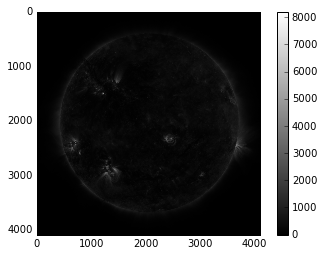

In [29]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.imshow(image_data, cmap='gray')
plt.colorbar()

In [30]:
from matplotlib.colors import LogNorm

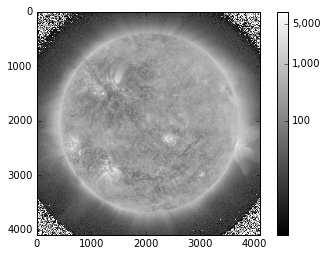

In [34]:
plt.imshow(image_data, cmap='gray', norm=LogNorm())
cbar = plt.colorbar(ticks=[1.e2, 1.e3, 5.e3])
cbar.ax.set_yticklabels(['100', '1,000', '5,000'])
